
<font color='blue'>
<h1 align="center"> Walmart Weekly Sales Prediction
</font>




[Walmart Weekly Sales Prediction](https://www.kaggle.com/datasets/varsharam/walmart-sales-dataset-of-45stores)

* Perform Exploratory Data Analysis of Weekly Sale Data to find insights

* Develop model to predict Weekly Sale using given features.



<font color='blue'>
<h1> 1. Import Required Libraries
</font>

In [39]:
# 1.0 Load Libraries

# 1.1 Data Manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [40]:
# 2.0 To display output of multiple commands from single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<font color='blue'>
<h1> 2. Load Data Set
</font>

In [41]:
#2 Load the data
### Connect to gdrive
#from google.colab import drive
#drive.mount('/gdrive')

### Read File
df_wm = pd.read_csv("/Users/aishwarya/Downloads/walmart-sales-dataset-of-45stores 2.csv")

<font color='blue'>
<h2> 3. Data Set Information
</font>
<h3> * The dataset has 6435 rows and 8 columns

<h3> * Sales Data
<h4>Store --- Store ID (1 to 45)<br>
Date --- Wed / Thursday when weekly sale was computed (for previous 7 days)<br>
Weekly_Sales  --- Weekly Sale in Dollars<br>

<h3> * Sale Influencing Factors
<h4>Holiday Flag --- Holiday (1) or Not (0)<br>
Temperature --- Average Temprature for the week in Fahrenheit<br>
Fuel_Price --- Average Fuel Price for the week in Dolalrs<br>
CPI ---- Consumer Price Index<br>

[CPI More Info](https://www.investopedia.com/terms/c/consumerpriceindex.asp) 

Unemployment --- US monthly unemployment rate<br>

[Unemployment More Info](https://www.investopedia.com/ask/answers/063015/how-does-us-bureau-labor-statistics-calculate-unemployment-rate-published-monthly.asp)

In [42]:
df_wm.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


<font color='blue'>
<h1> 4 Data Types Analysis and Memory Optimization 
</font>

<font color='blue'>
<h2> 4.1 Original Data Set
</font>

In [43]:
df_wm.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

<font color='blue'>
<h2> 4.2 Change These Fields to categorical
</font>

Holiday_Flag --- Yes (1) / No (0)<br>
Store --- ID of store 1 to 45<br>

In [44]:
#df_wm['Holiday_Flag'].unique()
df_wm['Holiday_Flag'] = df_wm['Holiday_Flag'].astype('category')
#df_wm['Store'].unique()
df_wm['Store'] = df_wm['Store'].astype('category')

<font color='blue'>
<h2> 4.3 Check value range to Change large data types to smaller
</font>

In [45]:
def check_float(min_value,max_value):
# float16 is too small to do any action on it like finding mean()
#    if max_value < np.finfo('float16').max and min_value > np.finfo('float16').min: 
#       return 'float16'
#    else:
       if max_value < np.finfo('float32').max and min_value > np.finfo('float32').min:
          return 'float32'
       else:
          return 'float64'

In [46]:
df_wm['Weekly_Sales'] = df_wm['Weekly_Sales'].astype(check_float(df_wm['Weekly_Sales'].min(),df_wm['Weekly_Sales'].max()))
df_wm['Temperature'] = df_wm['Temperature'].astype(check_float(df_wm['Temperature'].min(),df_wm['Temperature'].max()))
df_wm['Fuel_Price'] = df_wm['Fuel_Price'].astype(check_float(df_wm['Fuel_Price'].min(),df_wm['Fuel_Price'].max()))
df_wm['CPI'] = df_wm['CPI'].astype(check_float(df_wm['CPI'].min(),df_wm['CPI'].max()))
df_wm['Unemployment'] = df_wm['Unemployment'].astype(check_float(df_wm['Unemployment'].min(),df_wm['Unemployment'].max()))

<font color='blue'>
<h2> 4.4 Change Date field from Object to Datetime
</font>

In [47]:
df_wm['Date'] = pd.to_datetime(df_wm['Date'])

/Users/aishwarya/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/aishwarya/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/aishwarya/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/aishwarya/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Par

In [48]:
df_wm.dtypes
print()
df_wm.memory_usage().sum()

Store                 category
Date            datetime64[ns]
Weekly_Sales           float32
Holiday_Flag          category
Temperature            float32
Fuel_Price             float32
CPI                    float32
Unemployment           float32
dtype: object

194734

<font color='blue'>
<h3> Memory usage reduced from 411968 bytes to 194734 bytes
</font>

<font color='blue'>
<h1> 5 FEATURE ENGINEERING
</font>

<font color='blue'>
<h2> 5.1 Separate Year from the weekly report date
</font>

In [49]:
df_wm['Year'] = pd.DatetimeIndex(df_wm['Date']).year
df_wm['Year'] = df_wm['Year'].astype('category')

<font color='blue'>
<h2> 5.2 Separate Month from the weekly report date
</font>

In [50]:
df_wm['Month'] = pd.DatetimeIndex(df_wm['Date']).month
df_wm['Month'] = df_wm['Month'].astype('category')

In [51]:
df_wm.dtypes

Store                 category
Date            datetime64[ns]
Weekly_Sales           float32
Holiday_Flag          category
Temperature            float32
Fuel_Price             float32
CPI                    float32
Unemployment           float32
Year                  category
Month                 category
dtype: object

<font color='blue'>
<h1> 6 Analyze Correlation between features
</font>

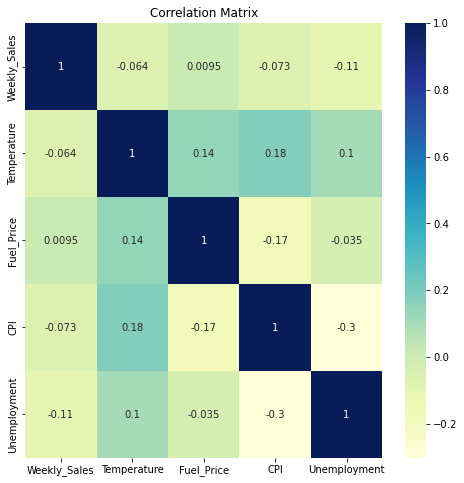

In [52]:

plt.figure(figsize=(8,8))
sns.heatmap(df_wm[["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment","Year"]].corr(),cmap="YlGnBu",annot=True)
plt.title('Correlation Matrix');

<font color='blue'>
<h1> 7 Fixing Holiday Flag
</font>

<font color='red'>
<H2> The holiday flag marking was incorrect for these reportings.<br>
</font>

<font color='red'>
<H3>
* 12-Oct-2010 (11-Oct was holiday in the reported data)<br>
* 24-Dec-2010 (Holiday Season Week)<br>
* 17-Dec-2010 (Holiday Season Week)<br>
* 12-Sep-2011 (5th Sept was holiday in the reported data)<br>
* 23-Dec-2011 (Holiday Season Week)<br>
* 04-Jun-2012 (28th May was holiday in the reported data)<br>
Hence marking Weekly Sales data for these weeks as Holiday Season. 
</font>

In [53]:
df_wm.loc[(df_wm['Holiday_Flag'] == 0)& (df_wm['Weekly_Sales'] > 25),'Holiday_Flag'] = 1

<font color='blue'>
<h1> 7 Feature Alteration for Categorical Features
</font>

<font color='blue'>
<h2> 7.1 Holiday_Flag - Convert from category to int
</font>

In [54]:
df_wm['Holiday_Flag'] = df_wm['Holiday_Flag'].astype('int16')

<font color='blue'>
<h2> 7.2 Encode Store ID using One-Hot Encoding
</font>

In [55]:
#df_wm['Store'].unique()
ohe = OneHotEncoder(categories='auto',drop='first',dtype='int16')
ohe.fit(df_wm[['Store']])
#ohe.categories_
enc_df = pd.DataFrame(ohe.transform(df_wm[['Store']]).toarray())
enc_df.columns = ohe.get_feature_names_out(['Store'])
df_wm = pd.concat([df_wm, enc_df], axis=1, join='inner')

OneHotEncoder(drop='first', dtype='int16')

<font color='blue'>
<h2> 7.3 Convert Year and Month from Category to Int
</font>

In [56]:
df_wm['Year']=df_wm['Year'].astype('int16')
df_wm['Month'] = df_wm['Month'].astype('int16')

<font color='blue'>
<h1> 8 Regression using Encoded Features
</font>

<font color='blue'>
<h2> 8.1 Random Forest Single Model
</font>

In [57]:
## Decision Tree does not work with Dates So take all fields
y = df_wm['Weekly_Sales']
X = df_wm.loc[ : , (df_wm.columns != 'Weekly_Sales') & (df_wm.columns != 'Date') & (df_wm.columns != 'Store')]
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size = 0.3,shuffle = True)

In [58]:
# Trying basic random forest with 50 estimators
rf_regressor = RandomForestRegressor(n_estimators=50,max_depth=None)
rf_regressor.fit(X_train,y_train)
y_pred = rf_regressor.predict(X_test)
print("MAE test : ",  mean_absolute_error(y_test,y_pred))
print("RMSE test : ",  np.sqrt(mean_squared_error(y_test,y_pred)))
print("RMSE test % : ", np.sqrt(mean_squared_error(y_test,y_pred))*100/y_test.mean())
print("R Squared test : ", r2_score(y_test,y_pred) )  

RandomForestRegressor(n_estimators=50)

MAE test :  82848.66769759839
RMSE test :  159484.34857618442
RMSE test % :  14.95269034919453
R Squared test :  0.9188826121543586


<font color='blue'>
<h2> 8.2 Random Forest Regressor - with Cross Validation
</font>

In [59]:
rf_regressor_cv = RandomForestRegressor(n_estimators=50,max_depth=None,criterion='squared_error')
scores_rfr = cross_validate(rf_regressor_cv, X_train, y_train, cv=6,scoring=('r2','neg_mean_squared_error'),return_estimator=True)
print('R Squared Test :',scores_rfr['test_r2'])
print('-ve MSE :',scores_rfr[
    'test_neg_mean_squared_error'])

R Squared Test : [0.90904605 0.91646066 0.93336853 0.92719532 0.93485229 0.92484151]
-ve MSE : [-3.20452194e+10 -2.88906539e+10 -2.20931515e+10 -2.22791986e+10
 -1.92501195e+10 -2.16360351e+10]


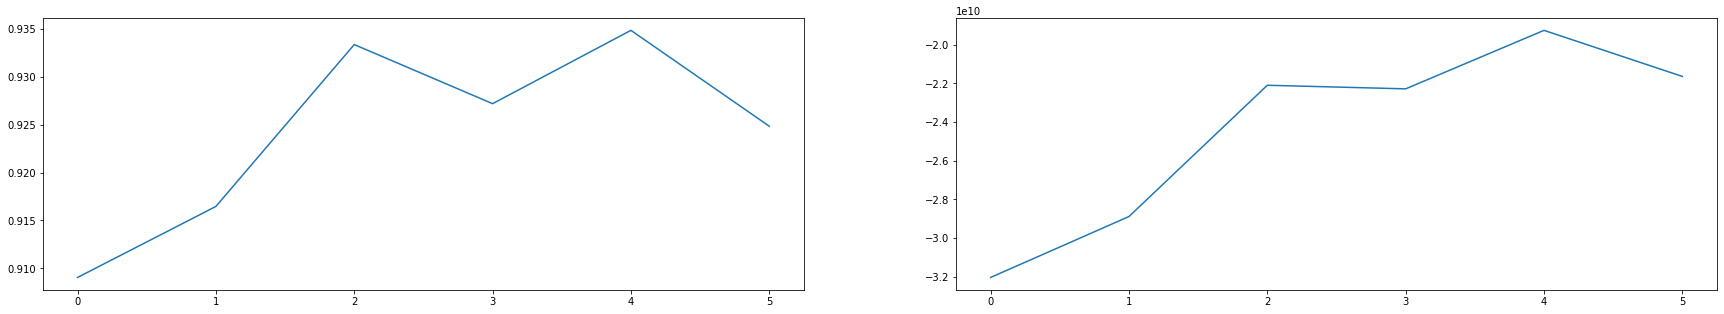

In [60]:
fig,ax = plt.subplots(1,2,figsize=(30,5))
ax[0].plot(scores_rfr['test_r2'])
ax[1].plot(scores_rfr['test_neg_mean_squared_error'])
plt.show();

In [61]:
## Find the best model giving maximum R squared
i = np.where(scores_rfr['test_r2'] == max(scores_rfr['test_r2']) )
i = i[0][0]
rf_regressor_cv = scores_rfr['estimator'][i]
y_pred = rf_regressor_cv.predict(X_test)
print("MAE test : ",  mean_absolute_error(y_test,y_pred))
print("RMSE test : ",  np.sqrt(mean_squared_error(y_test,y_pred)))
print("RMSE test % : ", np.sqrt(mean_squared_error(y_test,y_pred))*100/y_test.mean())
print("R Squared test : ", r2_score(y_test,y_pred) )  

MAE test :  81121.08171349042
RMSE test :  155913.96942144423
RMSE test % :  14.617944185030677
R Squared test :  0.9224739108726363


<font color='blue'>
<h3>
* The models have improved alot after Label Encoding of Categorical feature Store and setting Month and Year featurs as integers <br>
* R squared increased from around 10% to > 90% and mean error reduced from around 50% to 15% of mean target value
</font>

<font color='blue'>
<h1> 9 Apply Re-Scaling on features.
</font>

<font color='blue'>
<h3>
9.1 Backup original Data Frame
</font>

In [62]:
df_wm_ori = df_wm

<font color='blue'>
<h3>
9.2 Transform Target Variable with Log Transform
</font>

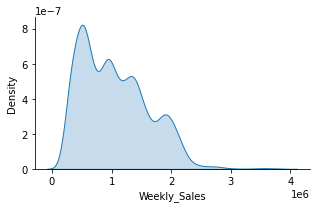

In [63]:
sns.displot(df_wm['Weekly_Sales'],kind='kde',fill=True,height=3,aspect=1.5);

In [64]:
df_wm['Weekly_Sales'] = np.log(df_wm[['Weekly_Sales']])

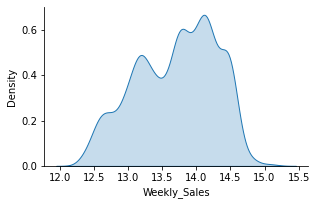

In [65]:
sns.displot(df_wm['Weekly_Sales'],kind='kde',fill=True,height=3,aspect=1.5);

<font color='blue'>
<h3>
9.3 Transform numeric source features with Standard Scalar
</font>

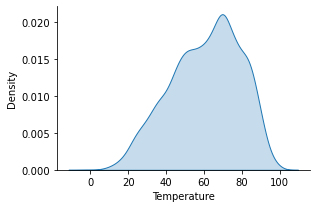

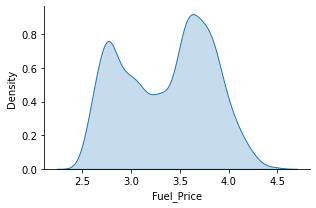

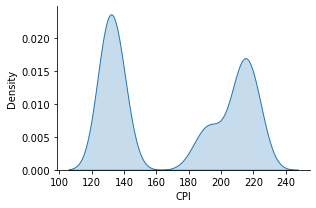

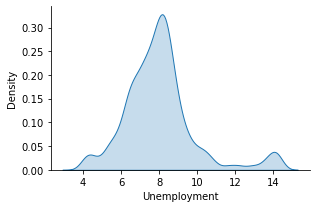

In [66]:
sns.displot(data=df_wm, x='Temperature', kind='kde', fill=True, height=3, aspect=1.5);
sns.displot(data=df_wm, x='Fuel_Price', kind='kde', fill=True, height=3, aspect=1.5);
sns.displot(data=df_wm, x='CPI', kind='kde', fill=True, height=3, aspect=1.5);
sns.displot(data=df_wm, x='Unemployment', kind='kde', fill=True, height=3, aspect=1.5);

In [67]:
Std_Scaler = StandardScaler()
Std_Scaler.fit(df_wm[['Temperature','Fuel_Price','CPI','Unemployment']])

df_wm[['Temperature','Fuel_Price','CPI','Unemployment']] = Std_Scaler.transform(df_wm[['Temperature','Fuel_Price','CPI','Unemployment']])

StandardScaler()

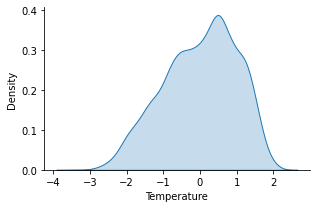

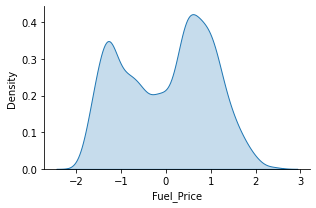

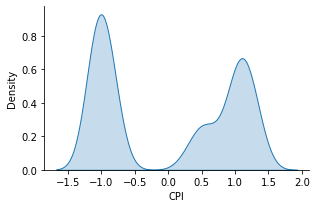

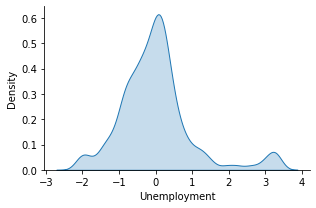

In [68]:
sns.displot(data=df_wm, x='Temperature', kind='kde', fill=True, height=3, aspect=1.5);
sns.displot(data=df_wm, x='Fuel_Price', kind='kde', fill=True, height=3, aspect=1.5);
sns.displot(data=df_wm, x='CPI', kind='kde', fill=True, height=3, aspect=1.5);
sns.displot(data=df_wm, x='Unemployment', kind='kde', fill=True, height=3, aspect=1.5);

<font color='blue'>
<h2> 10 Run Random Forest Regression on Re-Scaled Data
</font>

<font color='blue'>
<h2> 10.1 Random Forest Parameter Tuning with Grid Search CV
</font>

In [69]:
## Decision Tree does not work with Dates So take all fields
y = df_wm['Weekly_Sales']
X = df_wm.loc[ : , (df_wm.columns != 'Weekly_Sales') & (df_wm.columns != 'Date') & (df_wm.columns != 'Store')]
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size = 0.3,shuffle = True)

In [70]:
rf_regressor = RandomForestRegressor(random_state=0)

parameters = {'max_depth': [50,100,200,250,300,500],
              'n_estimators': [50,100,200, 250,300,500]}
              
#clf= GridSearchCV(rf_regressor, parameters,cv=5,scoring=('r2','neg_mean_squared_error'),n_jobs=2,refit=False,verbose=3,return_train_score=True ) -- Did not give best_score_ or best_estimator
clf= GridSearchCV(rf_regressor, parameters,cv=5,scoring='r2',n_jobs=3,refit=True,verbose=3,return_train_score=True )
clf.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=3,
             param_grid={'max_depth': [50, 100, 200, 250, 300, 500],
                         'n_estimators': [50, 100, 200, 250, 300, 500]},
             return_train_score=True, scoring='r2', verbose=3)

In [71]:
#sorted(clf.cv_results_.keys())
#clf.cv_results_.('mean_fit_time')
clf.best_score_
clf.best_estimator_

0.9660060567041594

RandomForestRegressor(max_depth=50, n_estimators=500, random_state=0)

In [72]:
# Trying basic random forest with 50 estimators
rf_regressor = clf.best_estimator_
y_pred = rf_regressor.predict(X_test)
print("MAE test : ",  mean_absolute_error(y_test,y_pred))
print("RMSE test : ",  np.sqrt(mean_squared_error(y_test,y_pred)))
print("explained_variance_score test : ", explained_variance_score(y_test,y_pred))
print("RMSE test % : ", np.sqrt(mean_squared_error(y_test,y_pred))*100/y_test.mean())
print("R Squared test : ", r2_score(y_test,y_pred) )  

MAE test :  0.06673396010529455
RMSE test :  0.10504642401754252
explained_variance_score test :  0.9681558210703892
RMSE test % :  0.766218507922361
R Squared test :  0.9681374990798848


/Users/aishwarya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


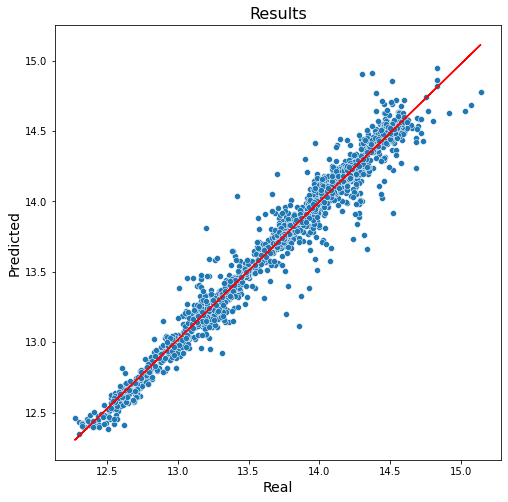

In [73]:
plt.figure(figsize=(8,8))
sns.scatterplot(y_test,y_pred)
m,b = np.polyfit(np.array(y_test), np. array(y_pred),1)
plt. plot(np.array(y_test), m * np.array(y_test) + b,color='red')
plt.title("Results", fontsize=16)
plt.xlabel("Real", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.show();

/Users/aishwarya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/aishwarya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/aishwarya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, Futur

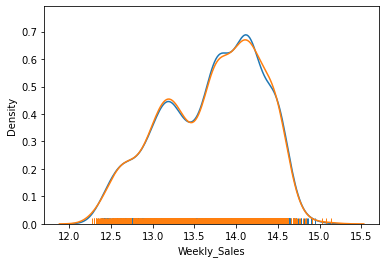

In [74]:
sns.distplot(y_pred,hist=False, rug=True)
sns.distplot(y_test,hist=False, rug=True);

<font color='blue'>
<h3>
* There is clear improvement in model after Re-Scaling of features<br>
* R squared has increased to > 96% and Error % reduced to only 0.78%
</font>

<font color='blue'>
<h2> 11 XGBoost Regression
</font>

<font color='blue'>
<h2> 10.1 Single XGBoost model
</font>

In [75]:
#XGBoost(verbosity=2,)

<font color='blue'>
<h2> 13 Inverse Transform to get actual values of Weekly_Sales
</font>

In [76]:
y_pred_orig = np.exp([y_pred])
y_pred_orig=y_pred_orig[0]
y_test_orig = np.exp([y_test])
y_test_orig=y_test_orig[0]
error = y_pred_orig - y_test_orig
Result=pd.DataFrame(
    {'y_pred_orig': y_pred_orig,
     'y_test_orig': y_test_orig,
     'error': error
    })
Result['Per_Error'] = Result['error'] / Result['y_test_orig']
Result.head(10)

,y_pred_orig,y_test_orig,error,Per_Error
0,1.947836e+06,1.939061e+06,8774.351811,0.004525
1,4.219546e+05,5.569253e+05,-134970.673317,-0.242350
2,8.541031e+05,7.796028e+05,74500.389413,0.095562
3,5.061174e+05,5.251324e+05,-19014.999823,-0.036210
4,7.902385e+05,8.101508e+05,-19912.316438,-0.024579
5,2.167191e+06,2.427642e+06,-260450.350705,-0.107285
6,1.276376e+06,1.604605e+06,-328229.602739,-0.204555
7,2.008748e+06,1.799520e+06,209228.340429,0.116269
8,1.573917e+06,1.606629e+06,-32712.864888,-0.020361
9,1.296497e+06,1.327036e+06,-30538.808239,-0.023013
